# Homework 2 - Logistic Regression
## CSCI 5622 - Spring 2019
***
**Name**: $Girish Narayanswamy$ 
***

This assignment is due on Canvas by **11.59 PM on Tuesday, February 12th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Overview 
***

Your task for this homework is to build a logistic regression model that implements stochastic gradient ascent. To start, you'll apply it to the task of determining whether a number is 8 or 9

We start by importing and plotting the given data

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

###### [ 50 points] Problem 1: Implementing the Logistic Regression Classifier
***

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output the corresponding label.
1.1 - Finish the `calculate_score` function to return the output of applying the dot product of the weights with the input parameter

1.2 - Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

1.3 - Finish the `compute_gradient` function to return the derivate of the cost w.r.t. the weights

1.4 - Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

1.5 - Finish the `mini_batch_update` function so that it performs mini-batch gradient descent on the batches of the training data set example and updates the weight vector correspondingly

In [3]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.w = np.zeros(X.shape[1]) # can remove from here and ask to be defined in the function
        self.eta = eta
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        score = np.dot(x, self.w) # dot x and weights for score
        return score
        
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        sig_denom = 1 + np.exp(-score) 
        sig = 1 / sig_denom # apply logistic curve
        return sig
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        # TODO: Finish this function to compute the gradient
        grad = np.dot(h - y, x)
        return grad
     
    def sgd_update(self):
        """
        Compute a stochastic gradient update over the entire dataset to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        for XX, yy in zip(self.X, self.y):
         
            score = self.calculate_score(XX) # get score for sigmoid
            h = self.sigmoid(score) # label / p
            grad = self.compute_gradient(XX, h, yy) 
            self.w = self.w - self.eta*grad # update weights based off gradient
            
        return self.w
            
    def mini_batch_update(self, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        num_entries = self.X.shape[0] # number of different test points
        for i in range(0, num_entries, batch_size): # step through in batch_size chunks of X
            
            score = self.calculate_score(self.X[i : i+batch_size]) # choose subset of X and y
            h = self.sigmoid(score)
            grad = self.compute_gradient(self.X[i : i+batch_size], h, self.y[i : i+batch_size])
            self.w = self.w - self.eta*grad # update weights based off batch
            
        return self.w
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for an example based on the logistic value
        # and return the log probability and the accuracy of those predictions
        if update_method == 'mini_batch_update': # use mini batch of size batch size
            self.mini_batch_update(*batch_size)
            
        elif update_method == 'sgd_update': # use default one-by-one
            self.sgd_update()
            
        else:
            return -1
        
        # re-organize the dataset X based off random permutation of indexes 
        rand_perm = np.random.permutation(self.X.shape[0]) # random permutation of indexes in X
        self.X = self.X[rand_perm] # re-order X based of rand_perm
        self.y = self.y[rand_perm] # re-order Y based of rand_perm
        
        log_prob = 0
        correct_class = 0
        
        for txx, tyy in zip(test_x, test_y):
            
            score = self.calculate_score(txx)
            p = self.sigmoid(score)
            
            if tyy == 1: 
                log_prob += np.log(p) # update log prob
                if p >= 0.5:
                    correct_class += 1 # if tyy = 1 and prob >= 0.5
                
            else: # tyy == 0
                log_prob += np.log(1 - p) # update log prob
                if p < 0.5:
                    correct_class += 1
                    
        accuracy = correct_class / len(test_x) # if tyy = 0 and prob < 0.5

        return(log_prob, accuracy)

        

In [4]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 2), -0.7)
        self.assertEqual(accuracy, 0)
        
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.016s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

##### [20 Points] Problem 2: Understanding the limits of the Logistic Regression Classifier

2.1 - After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for three different user-defined number of epochs 1, 3, 10], and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log


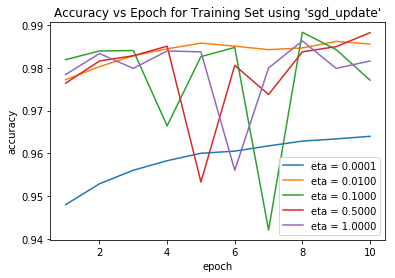

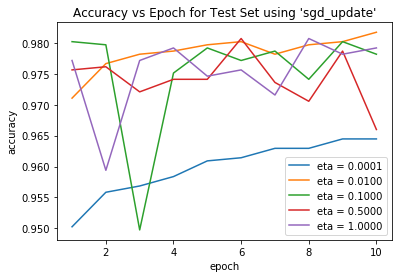

In [5]:
num_data = Numbers('data/mnist.pklz') # instatiate numbers class
train_x = num_data.train_x #grab training and test data from the provided data set 
train_y = num_data.train_y
test_x = num_data.valid_x
test_y = num_data.valid_y

eta_arr = [0.0001, 0.01, 0.1, 0.5, 1.0] # arr of eta / learning values to iterate through
epoch_arr = range(1,11) # iterate through epochs 1-10
accuracy_arr = np.zeros((10,1)) # array to hold accuracies for each epoch

# 2.1 Using 'sgd_update'

# checking acurracy vs epoch for training set 
for eta in eta_arr: # iterate through learning rate vals
    log_reg_inst = LogReg(train_x, train_y, eta) # set up instance of logistic regression classifier for eta
    
    for epoch in epoch_arr:
        log_prob, accuracy = log_reg_inst.progress(train_x, train_y, 'sgd_update')
        accuracy_arr[epoch - 1] = accuracy # update accuracy array 
        
    plt.plot(epoch_arr, accuracy_arr, label = 'eta = %.4f' %eta) # plt accuracy vs epoch for 5 etas

# Plot formatting
plt.title("Accuracy vs Epoch for Training Set using 'sgd_update'")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# checking acurracy vs epoch for test set 
for eta in eta_arr:
    log_reg_inst = LogReg(train_x, train_y, eta) # set up instance of logistic regression classifier for eta
    
    for epoch in epoch_arr:
        log_prob, accuracy = log_reg_inst.progress(test_x, test_y, 'sgd_update')
        accuracy_arr[epoch - 1] = accuracy
        
    plt.plot(epoch_arr, accuracy_arr, label = 'eta = %.4f' %eta) # plt accuracy vs epoch for 5 etas

# Plot formatting
plt.title("Accuracy vs Epoch for Test Set using 'sgd_update'")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
    

2.2 - After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for three different user-defined number of epochs 1, 3, 10], and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log


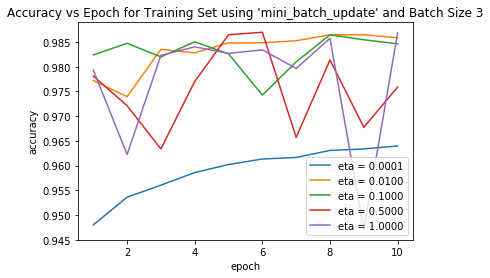

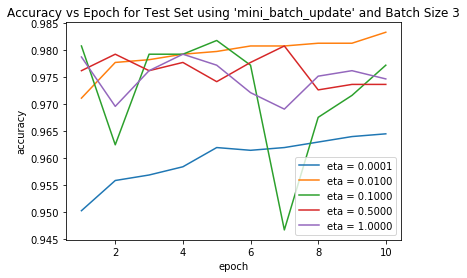

In [6]:
num_data = Numbers('data/mnist.pklz')
train_x = num_data.train_x
train_y = num_data.train_y
test_x = num_data.valid_x
test_y = num_data.valid_y

eta_arr = [0.0001, 0.01, 0.1, 0.5, 1.0]
epoch_arr = range(1,11)
accuracy_arr = np.zeros((10,1))

# 2.2 Using 'mini_batch_update' with Batch size 3

# checking acurracy vs epoch for training set 
for eta in eta_arr:
    log_reg_inst = LogReg(train_x, train_y, eta) # set up instance of logistic regression classifier for eta
    
    for epoch in epoch_arr:
        log_prob, accuracy = log_reg_inst.progress(train_x, train_y, 'mini_batch_update', 3)
        accuracy_arr[epoch - 1] = accuracy
        
    plt.plot(epoch_arr, accuracy_arr, label = 'eta = %.4f' %eta)

plt.title("Accuracy vs Epoch for Training Set using 'mini_batch_update' and Batch Size 3")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# checking acurracy vs epoch for test set 
for eta in eta_arr:
    log_reg_inst = LogReg(train_x, train_y, eta) # set up instance of logistic regression classifier for eta
    
    for epoch in epoch_arr:
        log_prob, accuracy = log_reg_inst.progress(test_x, test_y, 'mini_batch_update', 3)
        accuracy_arr[epoch - 1] = accuracy
        
    plt.plot(epoch_arr, accuracy_arr, label = 'eta = %.4f' %eta)

plt.title("Accuracy vs Epoch for Test Set using 'mini_batch_update' and Batch Size 3")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
    

**Q:** Briefly describe the role of learning rate (eta) on the efficiency of convergence during training.

For large learning rate values (large values of eta) the graph of accuracy is rather sporadic over each epoch. This is because at the start of a new epoch the high learning rate may cause the algorithm to jump over the optimal weights causing a drop in accuracy. The algorithm must then re-adjust the weights in the next epoch to get more optimal weights. This causes the oscillating behaviour portrayed by the purple and red trend lines. It is worth noting that these oscillations occur at fairly high accuracy values (between 0.95 and 1).

For small learning rate values (small values of eta) the accuracy starts fairly low but grows constantly which each additional epoch. The trend is less sporadic than for large eta values, and continuously grows, as opposed to oscillating. This is best portrayed by the blue and orange trend lines.

**Q:** Briefly describe the role of the number of epochs on validation accuracy.

After each epoch the validation accuracy generally increases (blue and orange trends). However, for high learning rates, as mentioned above, the accuracy tends to oscillate at a fairly high number. This suggests that the large number of epochs are especially useful if the learning rate is fairly low, as each additional epoch is almost guaranteed to increase the validation accuracy. 

### [ 30 points] Problem 4: Implementing the Logistic Regression Classifier for Multinomial Classification

You will now create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

In [7]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


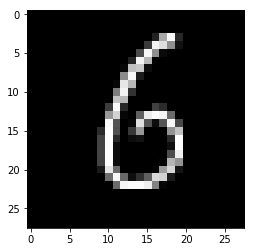

In [8]:
data2 = Numbers2('data/mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [9]:
class MultiLogReg:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, X, y, eta = 0.1):
        #self.X = self.normalize_data(X)
        self.X = X
        self.y = self.one_hot_encoding(y)
        self.eta = eta
        
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        m = len(y)
        one_hot_encode_y = np.zeros((m, 10))
        
        for i in range(m):
            one_hot_encode_y[i][y[i]] = 1
        
        return one_hot_encode_y
    
    def normalize_data(self, X):
        # TO DO: Normalize the dataset X using the mean and standard deviation of all the training examples 
        mean = np.mean(X)
        std = np.std(X)
        norm_X = (X - mean) / std
        
        return norm_X
            
    def get_optimal_parameters(self):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to its class which is (0-9), and the cost function will be against all of the other 
        # numbers, i.e. "the rest".
        opt_params = []
        
        for i in range(10): # 0 - 9
            log_reg_inst = LogReg(self.X, self.y[:,i], self.eta) # init inst of logisitic reg classifier
            log_reg_inst.sgd_update() # update on single epoch
            opt_params.append(log_reg_inst.w)
        
        return opt_params # 10 x number of features in X
    
    def predict(self, test_image, test_label):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        num_probs = np.zeros((10, 2))
        
        for i  in range(10):
            num_probs[i, 0] = i;
            score = np.dot(test_label[i], test_image)
            sigmoid = 1 / (1 + np.exp(-score))
            num_probs[i, 1] = sigmoid
            
        num_probs_sorted = num_probs[num_probs[:,1].argsort()]
        
        return num_probs_sorted

    
    ########### FUNCTIONS FOR CREATING CONFUSION MATRIX AND CALCULATING ACCURACY ###########
    def confusion_matrix(self, testX, testY):
        
        N = 10
        C = np.zeros((N, N), dtype=int)
        for xx, yy in zip(testX, testY):
            C[xx, yy] += 1
            
        return C
    
    
    def accuracy_percent(self, C):
       
        accuracy = np.sum(C.diagonal()) / C.sum()
        
        return(accuracy)    

### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most

In [10]:
# TO DO: COMPUTE ACCURACY ON THE TRAIN AND TEST DATA FROM NUMBERS2

In [11]:
multi_log_reg_inst = MultiLogReg(data2.train_x, data2.train_y, 0.0100)
opt_params = multi_log_reg_inst.get_optimal_parameters() 

# Confusion matrix and accuracy for training data
predict_train_arr = []
for xx in data2.train_x:
    num_probs = multi_log_reg_inst.predict(xx, opt_params)
    predict_value_train = num_probs[-1, 0]
    predict_train_arr.append(int(predict_value_train))
train_C = multi_log_reg_inst.confusion_matrix(predict_train_arr, data2.train_y)

# Confusion matrix and accuracy for test data
predict_test_arr = []
for xx in data2.test_x:
    num_probs = multi_log_reg_inst.predict(xx, opt_params)
    predict_value_test = num_probs[-1, 0]
    predict_test_arr.append(int(predict_value_test))
test_C = multi_log_reg_inst.confusion_matrix(predict_test_arr, data2.test_y)


print("Training Confusion Matrix:\n", train_C)
accuracy_train = 100 * (multi_log_reg_inst.accuracy_percent(train_C))
print("Accuracy for Training Set:", accuracy_train)
print("\n")
print("Test Confusion Matrix:\n", test_C)
accuracy_test = 100 * (multi_log_reg_inst.accuracy_percent(test_C))
print("Accuracy for Training Set:", accuracy_test)



Training Confusion Matrix:
 [[4796    1   41   15   14   72   47   25   44   39]
 [   1 5494   62   33   28   45   22   41  115   31]
 [   9   20 4235  102   41   16   25   49   44   18]
 [  20   28  176 4567   13  256   17   30  213   93]
 [   4    4   64    3 4317   53   15   37   28  118]
 [  18   29   31  150   20 3762  132   16  282   75]
 [  20    4   44   14   37   47 4635    3   22    4]
 [   6   11   97   66   15   25    5 4805   25  230]
 [  54   82  189   99   93  164   46   29 3980   49]
 [   4    5   29   52  281   66    7  140   89 4331]]
Accuracy for Training Set: 89.84400000000001


Test Confusion Matrix:
 [[ 959    0    5    2    3   16    5    7    4    8]
 [   0 1036    9    3   11    3    4    8   31    9]
 [   1    4  861   12    3   10    7    5    9    3]
 [   7    5   29  941    1   64    2    7   36   17]
 [   0    1   16    0  907    7    2    6    5   17]
 [   5    6   10   32    3  760   17    2   50   11]
 [   6    1    4    2    2   16  921    0    4    1]

In [12]:
# TO DO: PLOT THE CONFUSION MATRIX ON TEST AND TRAIN DATA. : Above